In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [117]:
n = 100
k = 2
min_ = 0
max_ = 1000
data = np.random.randint(min_, max_, [n, k])

In [118]:
new = np.random.randint(min_, max_, [1, k])

In [120]:
class KDTree:
    def __init__(self, coords, dim, parent=None, right=None, left=None):
        self.coords = coords
        self.dim = dim
        self.parent = parent
        self.right = right
        self.left = left

In [121]:
def build_kdtree(data, curr_dim=0):
    if not len(data):
        return None
    data = np.array(sorted(data, key=lambda x: x[curr_dim]))
    tree = KDTree(
        coords=data[len(data)//2],
        dim=curr_dim,
        parent=None,
        right=build_kdtree(data[:len(data)//2], (curr_dim+1) % data.ndim),
        left=build_kdtree(data[len(data)//2+1:], (curr_dim+1) % data.ndim)
    )
    if tree.right:
        tree.right.parent = tree
    if tree.left:
        tree.left.parent = tree
    return tree

In [122]:
def kdsearch(kdtree, coords):
    if kdtree.left is None and kdtree.right is None:
        return kdtree
    
    if kdtree.coords[kdtree.dim] <= coords[kdtree.dim]:
        return kdsearch(kdtree.left, coords)
    return kdsearch(kdtree.right, coords)

In [123]:
tree = build_kdtree(data)

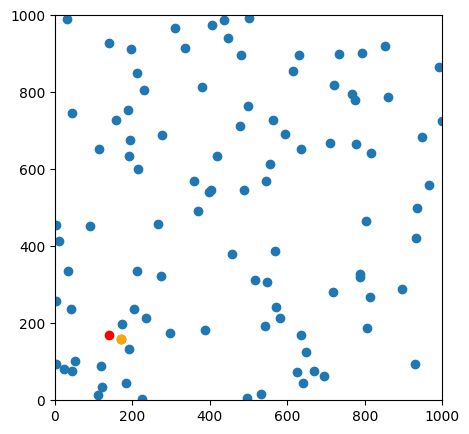

In [124]:
plt.figure(figsize=(5, 5))
plt.scatter(*data.T)
plt.scatter(*new.T, color='red')
plt.scatter(*kdsearch(tree, new[0]).coords, color='orange')
plt.ylim(min_, max_)
_ = plt.xlim(min_, max_)